In [2]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

housing = fetch_california_housing(as_frame=True)
data, target = housing.data, housing.target
type(housing)

sklearn.utils.Bunch

In [9]:
data,target = housing.data,housing.target
target.head()

0    452.6
1    358.5
2    352.1
3    341.3
4    342.2
Name: MedHouseVal, dtype: float64

In [12]:
target *= 100
target.head()

0    4526000.0
1    3585000.0
2    3521000.0
3    3413000.0
4    3422000.0
Name: MedHouseVal, dtype: float64

In [13]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(data, target)

DecisionTreeRegressor(random_state=0)

In [14]:
from sklearn.metrics import mean_absolute_error

target_predicted = regressor.predict(data)
score = mean_absolute_error(target, target_predicted)
print(f"On average, our regressor makes an error of {score:.2f} k$")

On average, our regressor makes an error of 0.00 k$


In [15]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(data, target, random_state=0)

In [16]:
regressor.fit(data_train, target_train)

DecisionTreeRegressor(random_state=0)

In [17]:
target_predicted = regressor.predict(data_train)
score = mean_absolute_error(target_train, target_predicted)
print(f"On average, our regressor makes an error of {score:.2f} k$")

On average, our regressor makes an error of 0.00 k$


In [18]:
target_predicted = regressor.predict(data_test)
score = mean_absolute_error(target_test, target_predicted)
print(f"On average, our regressor makes for real an error of {score:.2f} k$")

On average, our regressor makes for real an error of 474483.53 k$


Cross validation is the process of repeating the dataset split several time to show the real robustness of the model

In [36]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=40, test_size=0.3, random_state=0)
cv_results = cross_validate(
    regressor, data, target, cv=cv, scoring="neg_mean_absolute_error")
type(cv_results)

dict

In [38]:
import pandas as pd

cv_results = pd.DataFrame(cv_results)
cv_results.head()

,fit_time,score_time,test_score
0,0.096964,0.002307,-465035.621770
1,0.096410,0.004210,-470473.011951
2,0.102865,0.002553,-470517.063953
3,0.102524,0.003097,-449083.588501
4,0.099228,0.002573,-472839.739987


In [39]:
cv_results["test_error"] = -cv_results["test_score"]

In [40]:
cv_results.head(10)

,fit_time,score_time,test_score,test_error
0,0.096964,0.002307,-465035.621770,465035.621770
1,0.096410,0.004210,-470473.011951,470473.011951
2,0.102865,0.002553,-470517.063953,470517.063953
3,0.102524,0.003097,-449083.588501,449083.588501
4,0.099228,0.002573,-472839.739987,472839.739987
5,0.098356,0.002366,-460986.040052,460986.040052
6,0.099704,0.002328,-465467.989341,465467.989341
7,0.097646,0.002370,-461127.829457,461127.829457
8,0.097085,0.002333,-452422.572674,452422.572674
9,0.095009,0.002700,-450321.991279,450321.991279


In [23]:
len(cv_results)

40

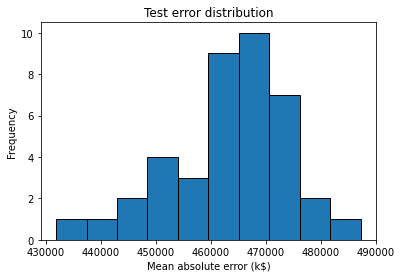

In [24]:
import matplotlib.pyplot as plt

cv_results["test_error"].plot.hist(bins=10, edgecolor="black")
plt.xlabel("Mean absolute error (k$)")
_ = plt.title("Test error distribution")

In [25]:
print(f"The mean cross-validated testing error is: "
      f"{cv_results['test_error'].mean():.2f} k$")

The mean cross-validated testing error is: 463156.34 k$


In [26]:
print(f"The standard deviation of the testing error is: "
      f"{cv_results['test_error'].std():.2f} k$")

The standard deviation of the testing error is: 11031.63 k$


the testing error is 46.36 +/- 1.17 k$.

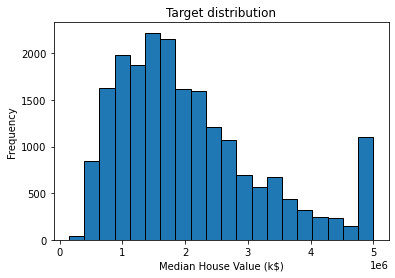

In [27]:
target.plot.hist(bins=20, edgecolor="black")
plt.xlabel("Median House Value (k$)")
_ = plt.title("Target distribution")

In [28]:
print(f"The standard deviation of the target is: {target.std():.2f} k$")

The standard deviation of the target is: 1153956.16 k$


In [29]:
cv_results = cross_validate(regressor, data, target, return_estimator=True)
cv_results

{'fit_time': array([0.18324399, 0.11518383, 0.11040306, 0.11412501, 0.11767697]),
 'score_time': array([0.00207281, 0.00202298, 0.00181603, 0.00186396, 0.00193524]),
 'estimator': [DecisionTreeRegressor(random_state=0),
  DecisionTreeRegressor(random_state=0),
  DecisionTreeRegressor(random_state=0),
  DecisionTreeRegressor(random_state=0),
  DecisionTreeRegressor(random_state=0)],
 'test_score': array([0.27064352, 0.4155826 , 0.44692705, 0.25111389, 0.44882754])}

In [30]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(regressor, data, target)
scores

array([0.27064352, 0.4155826 , 0.44692705, 0.25111389, 0.44882754])